In [1]:
%%HTML

<style>
td {
  font-size: 12px
}
th{
  font-size: 12px  
}
</style>

# Spatial Data Manipulation: Vector

## 1. Overview of Geopandas

`Geopands` is one of the most important Python libraries for working with vector data. It is based on the `pandas` library and has dependencies on `Shapely`, `Fiona` and `pyproj`. 
* `Shapely` is a Python package for manipulation and analysis of planar features, using functions from the GEOS library (the engine of PostGIS) and a port of the JTS (Java Topology Suite). Shapely only deals with analyzing geometries and offers no capabilities for reading and writing geospatial files. 
* `Fiona` the API (Application Programming Interface) of OGR (it used to stand for 'OpenGIS Simple Feature Reference Implementation', but not anymore; only a historical name in nature). It can be used for reading and writing data formats. 
* `pyproj` is a Python package that performs cartographic transformations and geodetic computations.

### 1.1. Importing the package and reading data
You can read geospatial data with `gpd.read_file()`, such as ESRI shapefile, GeoJSON, GeoPackage. To export geospatial data, you can use `gpd.to_file()`. 

In [2]:
import geopandas as gpd  # import geopandas package and set alias as gpd
import pandas as pd

states = gpd.read_file('./data/states.json')
print(type(states))
states

<class 'geopandas.geodataframe.GeoDataFrame'>


,name,fips,postal,latitude,longitude,region,geometry
0,Alabama,US01,AL,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999..."
1,Alaska,US02,AK,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647..."
2,Arizona,US04,AZ,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
3,Arkansas,US05,AR,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940..."
4,California,US06,CA,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
5,Colorado,US08,CO,38.9998,-105.5430,West,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
6,Connecticut,US09,CT,41.6486,-72.7594,Northeast,"POLYGON ((-73.49794 42.05451, -72.73222 42.035..."
7,Delaware,US10,DE,38.8657,-75.4112,South,"POLYGON ((-75.04839 38.44876, -75.71462 38.449..."
8,District of Columbia,US11,DC,38.8922,-77.0113,South,"POLYGON ((-77.04124 38.78954, -77.04123 38.789..."
9,Florida,US12,FL,28.1568,-81.6228,South,"POLYGON ((-87.53039 30.27420, -87.45789 30.411..."


### 1.2. Inheritance of Pandas DataFrame

`GeoPandas` works the same way with `Pandas`. In other words, you can use most of the functions of `DataFrame` for `GeoDataFrame`. 

In [3]:
states = states.set_index('postal')  # Define 'postal' column as the index of GeoDataFrame
print(states.shape)  # Return the size of GeoDataFrame. In our case, 51 rows and 6 columns
states.head()

(51, 6)


,name,fips,latitude,longitude,region,geometry
postal,,,,,,
AL,Alabama,US01,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999..."
AK,Alaska,US02,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647..."
AZ,Arizona,US04,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
AR,Arkansas,US05,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940..."
CA,California,US06,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."


In [4]:
states['name'].to_list()  # Convert GeoSeries to a list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [5]:
# Call FIPS (Federal Information Processing System) codes of Illinois
states.at['IL', 'fips'] 

'US17'

In [6]:
# Call regions of Alabama, Illinois, and Texas
states.loc[['AL', 'IL', 'TX'], 'region']  

postal
AL      South
IL    Midwest
TX      South
Name: region, dtype: object

In [7]:
# Call regions of Midwest with a conditional statement
states.loc[states['region'] == 'Midwest']

,name,fips,latitude,longitude,region,geometry
postal,,,,,,
IL,Illinois,US17,39.9460,-89.1991,Midwest,"POLYGON ((-91.43033 40.36860, -91.41023 40.551..."
IN,Indiana,US18,39.8874,-86.1396,Midwest,"POLYGON ((-88.05108 37.81960, -88.01881 38.021..."
IA,Iowa,US19,42.0423,-93.3891,Midwest,"POLYGON ((-96.45266 43.50179, -95.35994 43.500..."
KS,Kansas,US20,38.5000,-98.3309,Midwest,"POLYGON ((-102.04118 36.99198, -102.04012 38.4..."
MI,Michigan,US26,43.4343,-84.9479,Midwest,"POLYGON ((-89.95766 47.28691, -89.84283 47.464..."
MN,Minnesota,US27,46.0592,-93.3640,Midwest,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
MO,Missouri,US29,38.5487,-92.4460,Midwest,"POLYGON ((-89.66292 36.02307, -90.31539 36.023..."
NE,Nebraska,US31,41.5002,-99.6855,Midwest,"POLYGON ((-102.05017 40.00081, -102.05017 40.0..."
ND,North Dakota,US38,47.4675,-100.3020,Midwest,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."


### 1.3. Plot(); Major difference between GeoDataFrame and DataFrame

If you use `plot()` function in Pandas DataFrame, you will get a plot of numerical values. However, `plot()` in GeoPandas GeoDataFrame will give you a map. 

<AxesSubplot:>

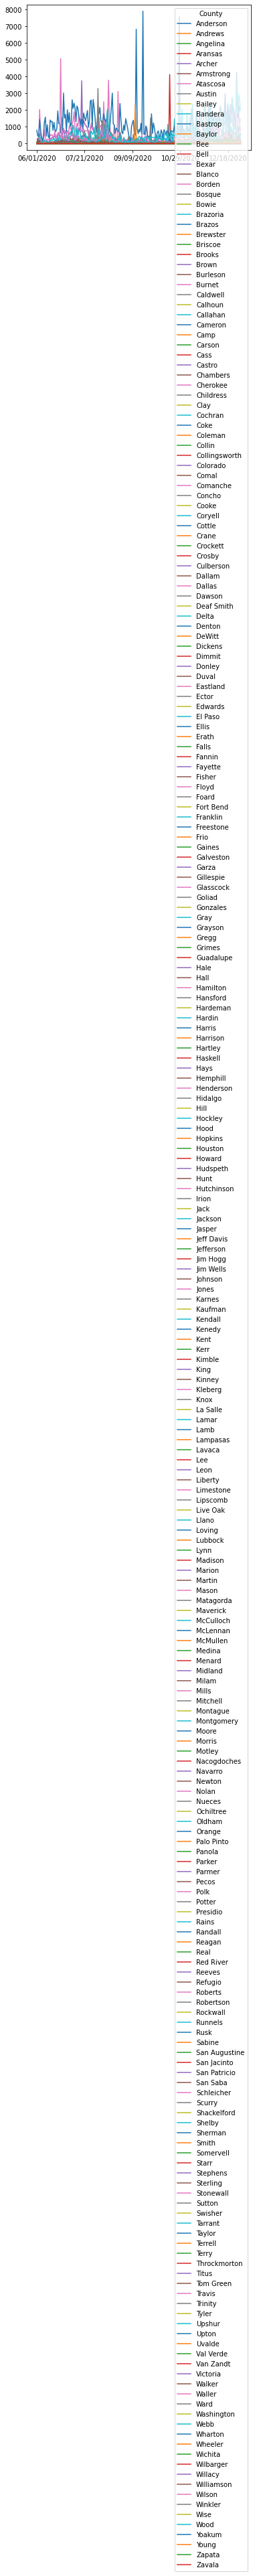

In [8]:
# Example of Pandas DataFrame
df = pd.read_csv('./data/daily_case.csv')
df = df.set_index('County')
df.transpose().plot()

<AxesSubplot:>

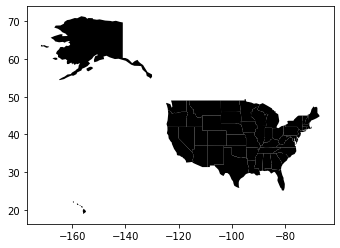

In [9]:
# Example of GeoPandas GeoDataFrame
# You can specify its color with 'color' attribute. 
states.plot(color='black')

Given that `geopandas` is specialized in geospatial analysis, it stores coordinates system as its attribute, too. You can check `Coordinate Reference System (CRS)` of the dataset with `.crs` attrbitue. 

In [10]:
print(states.crs) # coordinate system of imported dataset, here epsg:4326 indicates WGS 1984. 
print(type(states.crs)) # the coordinate system information is stored with `pyproj` package. 

epsg:4326
<class 'pyproj.crs.crs.CRS'>


You can change the crs with `to_crs()` function. Simply type epsg code with the attribute name `epsg`.

epsg:5070


<AxesSubplot:>

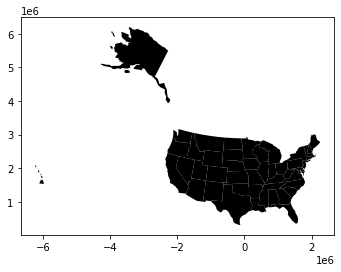

In [11]:
albers = states.to_crs(epsg=5070)  # project from WGS84 to USA Contiguous Albers Equal Area Conic (EPSG: 5070). 
print(albers.crs)
albers.plot(color='black')

You must have noticed that `GeoDataFrame` has an additional column than normal `DataFrame`, which is `geometry` column. `GeoPandas` takes advantage of the column to store geospatial data, with `Shapely`. This is why we can visualize maps with `GeoPandas`.

In [12]:
states.head()

,name,fips,latitude,longitude,region,geometry
postal,,,,,,
AL,Alabama,US01,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999..."
AK,Alaska,US02,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647..."
AZ,Arizona,US04,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
AR,Arkansas,US05,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940..."
CA,California,US06,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."


## 2. Data Creation
### 2.1. Creating Vector data with `Shapely`

`Shapely` has the following classes to represent geometry.

| Geometry Type | Class |
| :-: | :-: |
| Point | shapely.geometry.Point() | 
| Line | shapely.geometry.LineString() <br> shapely.geometry.polygon.LinearRing() | 
| Polygon | shapely.geometry.Polygon() | 
| Collection of points | shapely.geometry.MultiPoint() | 
| Collection of lines | shapely.geometry.MultiLineString() | 
| Collection of polygons | shapely.geometry.MultiPolygon() | 

In [13]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

POINT (2 2)
<class 'shapely.geometry.point.Point'>


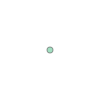

In [14]:
# creating a point
pnt = Point(2.0, 2.0)  # x, y coordinates of a point
print(pnt.wkt)
print(type(pnt))
pnt

LINESTRING (0 0, 3 5, 8 6, 10 10)
<class 'shapely.geometry.linestring.LineString'>


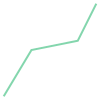

In [15]:
# creating a line
line = LineString([(0, 0), (3,5), (8, 6), (10,10)])  # x, y coordinates of sequences of points
print(line.wkt)
print(type(line))
line

LINEARRING (0 0, 3 3, 5 8, 3 0, 0 0)
<class 'shapely.geometry.polygon.LinearRing'>


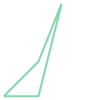

In [16]:
# creating a ring
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0,0), (3,3), (5,8), (3,0)])  # The purpose of this class is to create a boundary of a polygon
print(ring.wkt)
print(type(ring))
ring

POLYGON ((0 0, 5 0, 5 7, 0 9, 0 0))
<class 'shapely.geometry.polygon.Polygon'>


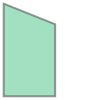

In [17]:
# creating a polygon
pyg = Polygon(((0, 0), (5, 0), (5, 7), (0, 9))) # The order should be kept. 
print(pyg.wkt)
print(type(pyg))
pyg

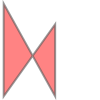

In [18]:
# The order of points matters. The example below shows a situation if the order of points is messed up. 
pyg2 = Polygon(((0, 0), (5, 7), (5, 0), (0, 9)))
pyg2

MULTIPOINT (0 0, 3 3)
<class 'shapely.geometry.multipoint.MultiPoint'>


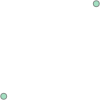

In [19]:
# a collection of points
pnts = MultiPoint([(0.0, 0.0), (3.0, 3.0)])
print(pnts.wkt)
print(type(pnts))
pnts

POINT (0 0)
<class 'shapely.geometry.point.Point'>


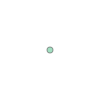

In [20]:
# how to slice a collection of points
pnt1 = pnts.geoms[0]
print(pnt1.wkt)
print(type(pnt1))
pnt1

###  2.2. Converting DataFrame to GeoDataFrame

In [21]:
import pandas as pd

# Create a DataFrame with the capitals and its coordinates of some countries in South America. 
capitals = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

capitals

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [22]:
capitals_gdf = gpd.GeoDataFrame(capitals, 
                                # a function to create points based on given coordinates
                                geometry=gpd.points_from_xy(capitals.Longitude, capitals.Latitude) 
                               )
capitals_gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


`capitals_gdf` is just created from DataFrame so it does not have crs. However, it is still able to be plotted.

None


<AxesSubplot:>

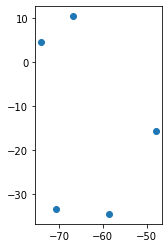

In [23]:
print(capitals_gdf.crs)
capitals_gdf.plot()

In [24]:
'''
# The most up to date version ('0.10.2') of GeoPandas has the function `set_crs()`, that can be used as shown below. 
capitals_gdf = capitals_gdf.set_crs(epsg=4326)

However, we will do it another way that the current version on CyberGISX support, given its version of GeoPandas is 0.7.0. 
'''
import pyproj

capitals_gdf.crs = pyproj.CRS.from_user_input('epsg:4326')
capitals_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

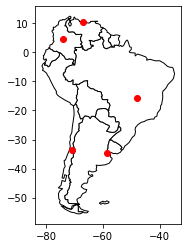

In [25]:
# Plotting the boundary of counties in South America as a background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# Overlaying the GeoDataFrame (capitals_gdf) created from a DataFrame
capitals_gdf.plot(ax=ax, color='red')

## 3. Functions of GeoPandas
### 3.1. `.cx[ ]`: Coordinate based indexing

In [26]:
# a function to help your understanding on coordinate based indexing

def create_bbox(lower_left, upper_right):  
    '''Return a bounding box using two coordinates (lower left corner and upper right corner)
    
    Input : lower_left - lower left corner of a bounding box (x_coordinate, y_coordinate)
            upper_right - upper right corner of a bounding box (x_coordinate, y_coordinate)
    
    Output: GeoDataFrame only with a bounding box geometry
    
    '''
    ll = lower_left  # lower left
    lr = (upper_right[0], lower_left[1])  # lower right
    ur = upper_right # upper right
    ul = (lower_left[0], upper_right[1]) # upper left
    
    bbox = Polygon((ll, lr, ur, ul))
    bbox_gdf = gpd.GeoDataFrame(geometry=[bbox])
    
    return bbox_gdf
   

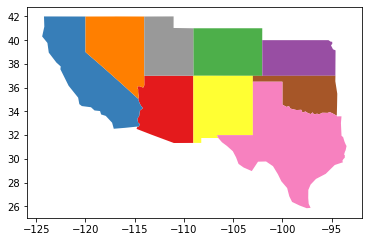

In [27]:
x_min = -124
x_max = -100
y_min = 30
y_max = 40

# Coordinate based indexer (gpd.GeoDataFrame.cx)
exp = states.cx[x_min:x_max, y_min: y_max]  # .cx[xmin:xmax, ymin:ymax]
ax = exp.plot(cmap='Set1')
# create_bbox((x_min, y_min), (x_max, y_max)).boundary.plot(ax=ax, color='black')  # uncomment this to see a bounding box

---
### *Exercise*
1. Search the States under the latitude of 30.
2. Count the number of states and save the number as `count_states`. 
3. Save the names of states as `name_states`.
---

In [28]:
# Your code here
count_states = states.cx[:,:30].shape[0]
name_states = states.cx[:,:30]['name'].to_list()


In [29]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

assert count_states == 4
assert name_states == ['Florida', 'Hawaii', 'Louisiana', 'Texas']

print('Success!')

Success!


### 3.2. Geometrical methods inherited from `Shapely`

`Shapely` has various gemetrical methods, such as calculating the area or perimeter of geometry. 

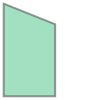

In [30]:
# A polygon we created earlier
pyg

In [31]:
# apply geometrical methods with Shapely
print(pyg.area)  # area
print(pyg.bounds)  # bounding box
print(pyg.length)  # perimeter
print(pyg.geom_type)  # geometry type

40.0
(0.0, 0.0, 5.0, 9.0)
26.385164807134505
Polygon


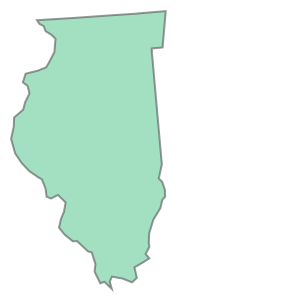

In [32]:
# Use case: Example of real dataset
albers.loc['IL', 'geometry']

In [33]:
# To indicate that the unit of Albers projection is `meter`
albers.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
print(albers.loc['IL', 'geometry'].area)  # in meters
print(albers.loc['IL', 'geometry'].bounds)
print(albers.loc['IL', 'geometry'].length)  # in meters
print(albers.loc['IL', 'geometry'].geom_type)

151003553007.96494
(378535.2952513433, 1567479.232043739, 730883.6018448916, 2200488.00431923)
1887145.1715682622
Polygon


In [35]:
print(albers.loc['HI', 'geometry'].area)  # in meters
print(albers.loc['HI', 'geometry'].bounds)
print(albers.loc['HI', 'geometry'].length)  # in meters
print(albers.loc['HI', 'geometry'].geom_type)

16923028998.30241
(-6239299.801761352, 1530861.8285968797, -5978009.672543132, 2078147.40912012)
1078669.032881122
MultiPolygon


<AxesSubplot:>

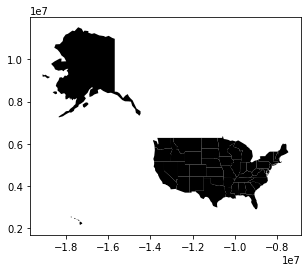

In [36]:
# The following example is to show the impact of projections (crs) on calculating area and peripeter of shape. 
merc = albers.to_crs(epsg=3857)  # Change projection to Web Mercator (epsg:3857)
merc.plot(color='black')

99905.87226277194 SqMi


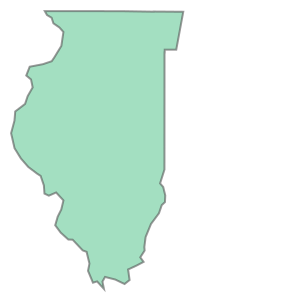

In [37]:
# Shape of Illinois with Web Mercator projection (i.e., Equirectangular projection)
print(merc.loc['IL', 'geometry'].area / 2.59e+6, 'SqMi') # Unit: Square Mile
merc.loc['IL', 'geometry']

58302.53011890538 SqMi


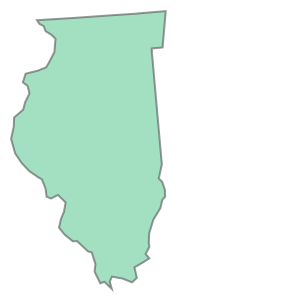

In [38]:
# Shape of Illinois with Albers Albers Equal Area Conic (i.e., Equal-area projection)
print(albers.loc['IL', 'geometry'].area / 2.59e+6, 'SqMi') # Unit: Square Mile
albers.loc['IL', 'geometry']

### 3.3. Overlay

You can perfrom spatial overlay between two GeoDataFrames, as shown below. Currently, it only supports data GeoDataFrames with uniform geometry types, i.e. containing only (Multi)Polygons, or only (Multi)Points, or a combination of (Multi)LineString and LinearRing shapes.
<br><br>
source: https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html <br>
source: https://geopandas.org/en/stable/docs/user_guide/set_operations.html

In [39]:
# Create two GeoDataFrame, each has two square polygons 
pyg_A = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                       Polygon([(2,2), (4,2), (4,4), (2,4)])])
pyg_B = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                       Polygon([(3,3), (5,3), (5,5), (3,5)])])

gdf1 = gpd.GeoDataFrame({'geometry': pyg_A, 'df1_data':[1,2]})
gdf2 = gpd.GeoDataFrame({'geometry': pyg_B, 'df2_data':[1,2]})

<AxesSubplot:>

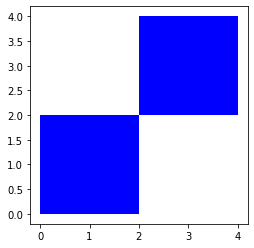

In [40]:
gdf1.plot(color='blue')

<AxesSubplot:>

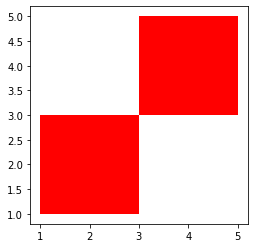

In [41]:
gdf2.plot(color='red')

<AxesSubplot:>

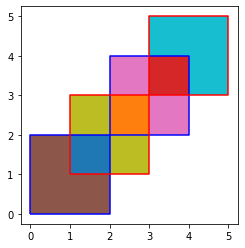

In [42]:
# 'union' returns all those possible geometries.
ax = gpd.overlay(gdf1, gdf2, how='union').plot(cmap='tab10')
gdf1.boundary.plot(color='blue', ax=ax)
gdf2.boundary.plot(color='red', ax=ax)

<AxesSubplot:>

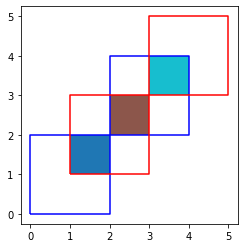

In [43]:
# 'intersection' returns only those geometries that are contained by both GeoDataFrames.
ax = gpd.overlay(gdf1, gdf2, how='intersection').plot(cmap='tab10')
gdf1.boundary.plot(color='blue', ax=ax)
gdf2.boundary.plot(color='red', ax=ax)

<AxesSubplot:>

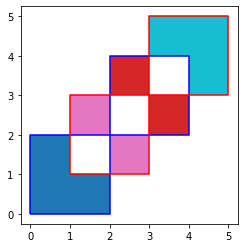

In [44]:
# 'symmetric_difference' is the opposite of 'intersection' and 
# returns the geometries that are only part of one of the GeoDataFrames but not of both.
ax = gpd.overlay(gdf1, gdf2, how='symmetric_difference').plot(cmap='tab10')
gdf1.boundary.plot(color='blue', ax=ax)
gdf2.boundary.plot(color='red', ax=ax)

<AxesSubplot:>

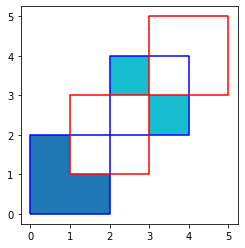

In [45]:
# 'difference' returns the geometries that are part of gdf1 but are not contained in gdf2.
ax = gpd.overlay(gdf1, gdf2, how='difference').plot(cmap='tab10')
gdf1.boundary.plot(color='blue', ax=ax)
gdf2.boundary.plot(color='red', ax=ax)

<AxesSubplot:>

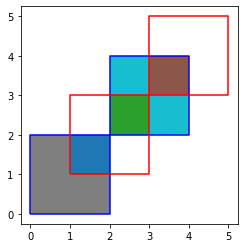

In [46]:
# 'identity' returns the surface of gdf1 but they are divided based on the overlay from gdf2.
ax = gpd.overlay(gdf1, gdf2, how='identity').plot(cmap='tab10')
gdf1.boundary.plot(color='blue', ax=ax)
gdf2.boundary.plot(color='red', ax=ax)

---
### *Exercise*

1. import two files `illinois_county.json` and `tl_2021_17019_areawater.shp` in `data` folder, and name them as `county` and `water`, respectively. 
2. Select only Champagin county from `county` with `.loc` method, and resave the resulted GeoDataFrame back to `county`. 
3. Change the coordinate reference system for two dataset to the Illinois State Plane East (epsg:3435)
4. Calculate the area not covered by water in sqaure miles (original unit is in feet) and save the number as `diff_area` (i.e., divide sqft by 2.788e+7).
---

In [47]:
# Your code here

# Step 1
county = gpd.read_file('./data/illinois_county.json')
water = gpd.read_file('./data/tl_2021_17019_areawater.shp')

# Step 2
county = county.loc[county['NAME'] == 'Champaign']

# Step 3
county = county.to_crs(epsg=3435)
water = water.to_crs(epsg=3435)

# Step 4
diff_area = gpd.overlay(county, water, how='symmetric_difference').area[0] / 2.788e+7


In [48]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert county['NAME'].values[0] == 'Champaign'
assert county.crs.name == 'NAD83 / Illinois East (ftUS)'
assert water.crs.name == 'NAD83 / Illinois East (ftUS)'
assert round(diff_area) == 996

print("Success!")

Success!


### 3.4. Spatial Join 
#### 3.4.1. Data preprocessing (i.e., importing data and matching crs)

In [49]:
# Importing necessary data for spatially joining fire location data to State polygons
# Fire Data is from USGS
fires = gpd.read_file(r'./data/fires_usgs.shp')
fires

,Incid_Name,Incid_Type,Ig_Date,geometry
0,HELLS HOLLOW,Prescribed Fire,2012-10-04,POINT (-111.50798 41.75847)
1,KLONE PEAK,Wildfire,2012-09-08,POINT (-120.58152 47.97210)
2,BASALT,Wildfire,2012-09-08,POINT (-120.74488 47.96732)
3,PYRAMID,Wildfire,2012-09-08,POINT (-120.58122 48.04474)
4,FIRST CREEK,Wildfire,2012-09-08,POINT (-120.26049 47.89598)
...,...,...,...,...
28579,NW SANDS UNITS I/F/C/A,Prescribed Fire,2019-05-24,POINT (-91.29028 46.63399)
28580,UNNAMED,Unknown,2015-03-22,POINT (-96.45150 36.71381)
28581,UNNAMED,Prescribed Fire,2019-03-22,POINT (-94.62221 34.33207)
28582,RX - MCWA WEST,Prescribed Fire,2019-03-27,POINT (-94.71266 34.31007)


<AxesSubplot:>

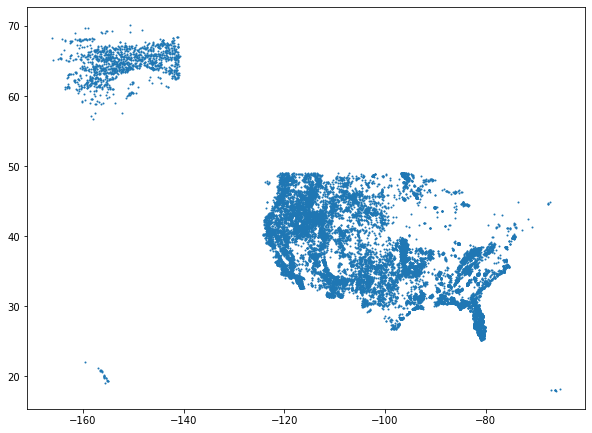

In [50]:
# plot all fires as point data on a map
fires.plot(markersize=1, figsize=(10,10))

You need to check the coordinate reference system of two datasets before running a spatial join to make sure they have the same coordinate reference system. 

In [51]:
# crs of fire data
fires.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [52]:
# crs of state geometry 
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
# Given that two dataset has different crs, we need to make them identical.
# reproject fires shapefile the state geometry shapefile
fires = fires.to_crs(epsg=4326)

#### 3.4.2. Spatial join with <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html> .sjoin() </a> method

`.sjoin()` method has numerous `op` attributes (i.e., 'intersects', 'contains', 'within', 'touches', 'crosses', 'overlaps') to test various types of geographical relationships. <br>
**Note**: the attribute `op` attribute is deprecated in the up-to-date version of GeoPandas (0.10.2) and is replaced with `predicate`. 

In [54]:
# op (or predicate) can be 'intersects', 'contains', 'within', 'touches', 'crosses', 'overlaps'
state_fires = gpd.sjoin(fires, states[['name', 'geometry']], op='within')  
state_fires

/Users/zawoon96/opt/anaconda3/envs/sa/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Incid_Name,Incid_Type,Ig_Date,geometry,index_right,name
0,HELLS HOLLOW,Prescribed Fire,2012-10-04,POINT (-111.50799 41.75848),UT,Utah
372,CHURCH CAMP,Wildfire,2012-06-24,POINT (-110.66860 39.89245),UT,Utah
381,DALLAS CANYON,Wildfire,2012-07-27,POINT (-112.94540 40.62366),UT,Utah
382,IBAPAH,Wildfire,2012-07-29,POINT (-113.95799 40.00499),UT,Utah
412,73,Wildfire,2012-05-17,POINT (-112.23804 40.26205),UT,Utah
...,...,...,...,...,...,...
28018,FINK SANDSTONE RX,Prescribed Fire,2019-03-26,POINT (-88.71612 37.50626),IL,Illinois
28022,HARRIS BRANCH RX,Prescribed Fire,2019-03-28,POINT (-88.27095 37.55491),IL,Illinois
28054,UNNAMED,Prescribed Fire,2019-03-25,POINT (-88.17146 41.37205),IL,Illinois
28061,UNNAMED,Prescribed Fire,2019-03-26,POINT (-88.03922 41.38849),IL,Illinois


In [55]:
# create pandas DataFrame object with states and fire count
counts_per_state = state_fires.groupby('name').size() # Will return a Series, not a DataFrame
counts_per_state = counts_per_state.to_frame(name='number_of_fires') # Convert Series to DataFrame
counts_per_state.sort_values(by='number_of_fires', ascending=False) # list highest values first 

,number_of_fires
name,
Florida,5329
Kansas,1964
California,1867
Idaho,1517
Texas,1397
Alaska,1334
Arizona,1158
Oklahoma,1066
New Mexico,1007


<a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html> `.merge()` </a> function will add a dataframe into the other based on a given index. Be aware that if you do not specify `how='outer`, it will automatically return the values that only exist in both DataFrames, meaning that some states will be disregarded.

In [56]:
counts_per_state

,number_of_fires
name,
Alabama,672
Alaska,1334
Arizona,1158
Arkansas,568
California,1867
Colorado,374
Delaware,3
Florida,5329
Georgia,604


In [57]:
states_sjoin_1 = states.merge(counts_per_state, left_on='name', right_on='name', how='outer')
states_sjoin_1

,name,fips,latitude,longitude,region,geometry,number_of_fires
0,Alabama,US01,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999...",672.0
1,Alaska,US02,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647...",1334.0
2,Arizona,US04,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",1158.0
3,Arkansas,US05,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",568.0
4,California,US06,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",1867.0
5,Colorado,US08,38.9998,-105.5430,West,"POLYGON ((-102.05017 40.00081, -102.04012 38.4...",374.0
6,Connecticut,US09,41.6486,-72.7594,Northeast,"POLYGON ((-73.49794 42.05451, -72.73222 42.035...",NaN
7,Delaware,US10,38.8657,-75.4112,South,"POLYGON ((-75.04839 38.44876, -75.71462 38.449...",3.0
8,District of Columbia,US11,38.8922,-77.0113,South,"POLYGON ((-77.04124 38.78954, -77.04123 38.789...",NaN
9,Florida,US12,28.1568,-81.6228,South,"POLYGON ((-87.53039 30.27420, -87.45789 30.411...",5329.0


#### 3.4.3. Spatial Join with `.loc` method of `GeoDataFrame` and relationship test method of  `shapely`

You can test the relationship between two geometries by using <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersects.html>`intersects` </a>, <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.contains.html>`contains`</a>, <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.within.html>`within`</a> so on. This will give you Boolean (i.e., True or False). 

In [58]:
# Test the relationship between the fire location points and State polygons
fires['geometry'].intersects(
        states.at['AL', 'geometry']
    )

0        False
1        False
2        False
3        False
4        False
         ...  
28579    False
28580    False
28581    False
28582    False
28583    False
Length: 28584, dtype: bool

Combination of the relationship test with `.loc` method will slice the given GeoDataFrame

In [59]:
# The following example will return the fire locations in the state of Alabama
fires.loc[
    fires['geometry'].intersects(
        states.at['AL', 'geometry']
    )
]

,Incid_Name,Incid_Type,Ig_Date,geometry
642,SMOKE CHASER,Wildfire,2012-01-31,POINT (-85.62636 33.75153)
987,SEMINOLE FIRE,Wildfire,2011-06-05,POINT (-87.46848 30.53995)
988,ST MARK CHURCH,Wildfire,2011-03-04,POINT (-85.72716 32.26555)
989,MUD CREEK FIRE,Wildfire,2011-06-04,POINT (-87.10912 33.40652)
990,FLEET,Wildfire,2011-02-19,POINT (-85.54137 33.89979)
...,...,...,...,...
28565,OK C-61,Prescribed Fire,2019-03-05,POINT (-87.41140 32.87049)
28566,UNNAMED,Prescribed Fire,2019-03-26,POINT (-87.31914 32.93106)
28567,UNNAMED,Unknown,2019-04-16,POINT (-87.48566 32.94249)
28568,UNNAMED,Prescribed Fire,2019-03-20,POINT (-87.33001 32.98040)


Let's combine all the processes into one cell. 

In [60]:
# Now, let's count the number of fires in each state. 
states_sjoin_2 = states.copy() # Make a copy
states_sjoin_2['number_of_fires'] = 0 # Create an empty column to store the result of spatial join

for idx, row in states_sjoin_2.iterrows(): # Iterrating through rows of GeoDataFrame
    # This will give you the Dataframe of fires associated with each state
    temp_ = fires.loc[fires['geometry'].intersects(row['geometry'])]  
    
    if temp_.shape[0]: # If the sliced dataframe is not empty
        states_sjoin_2.at[idx, 'number_of_fires'] = temp_.shape[0] # Enter the number of fires in each state
        
    else: # If the sliced dataframe is empty
        states_sjoin_2.at[idx, 'number_of_fires'] = 0 # Enter 0 for the state in the loop. 
        
states_sjoin_2.head()

,name,fips,latitude,longitude,region,geometry,number_of_fires
postal,,,,,,,
AL,Alabama,US01,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999...",672
AK,Alaska,US02,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647...",1334
AZ,Arizona,US04,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",1158
AR,Arkansas,US05,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",568
CA,California,US06,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",1867


In [61]:
# Compare the results of the two appraoches of spatial join
states_sjoin_1.head()

,name,fips,latitude,longitude,region,geometry,number_of_fires
0,Alabama,US01,32.8551,-86.7184,South,"POLYGON ((-88.16696 34.99967, -86.90968 34.999...",672.0
1,Alaska,US02,65.3609,-151.6040,West,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647...",1334.0
2,Arizona,US04,34.3046,-111.9350,West,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",1158.0
3,Arkansas,US05,34.7563,-92.1428,South,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",568.0
4,California,US06,36.7496,-119.5910,West,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",1867.0


---
### *Exercise*
```python
# Original code
fires.loc[fires['geometry'].intersects(states.at['AL', 'geometry'])]
```

1. From the original code above, replace `intersects()` with `within()`, and count the number of fires in Illinois. Then, save the number of fires as `fire_in_IL`. <br><br>

2. From the original code above, replace `intersects()` with `contains()`, and think about why it doesn't have any return for `contains()`. 
<br><br>
3. When can we use `contains()`? Find the state that had a fire on 2000-01-01, and save ONLY the name of the state as `first_fire_in_millennium`. <br>
**Hint**: the following statement will give you a coordinates (Point) that the fire ignited on 2000-01-01. 
```python
fires.loc[fires['Ig_Date'] == '2000-01-01', 'geometry'].values[0]
```

---

In [62]:
# Check the result of original code
fires.loc[fires['geometry'].intersects(states.at['AL', 'geometry'])]

,Incid_Name,Incid_Type,Ig_Date,geometry
642,SMOKE CHASER,Wildfire,2012-01-31,POINT (-85.62636 33.75153)
987,SEMINOLE FIRE,Wildfire,2011-06-05,POINT (-87.46848 30.53995)
988,ST MARK CHURCH,Wildfire,2011-03-04,POINT (-85.72716 32.26555)
989,MUD CREEK FIRE,Wildfire,2011-06-04,POINT (-87.10912 33.40652)
990,FLEET,Wildfire,2011-02-19,POINT (-85.54137 33.89979)
...,...,...,...,...
28565,OK C-61,Prescribed Fire,2019-03-05,POINT (-87.41140 32.87049)
28566,UNNAMED,Prescribed Fire,2019-03-26,POINT (-87.31914 32.93106)
28567,UNNAMED,Unknown,2019-04-16,POINT (-87.48566 32.94249)
28568,UNNAMED,Prescribed Fire,2019-03-20,POINT (-87.33001 32.98040)


In [63]:
# Your code here

# Step 1
fire_in_IL = fires.loc[fires['geometry'].within(states.at['IL', 'geometry'])].shape[0]
print(fire_in_IL)

# Step 2
print(fires.loc[fires['geometry'].contains(states.at['AL', 'geometry'])])

# Step 3
fire_point = fires.loc[fires['Ig_Date'] == '2000-01-01', 'geometry'].values[0] 
fire_point

first_fire_in_millennium = states.loc[states['geometry'].contains(fire_point), 'name'].values[0]
print(first_fire_in_millennium)


28
Empty GeoDataFrame
Columns: [Incid_Name, Incid_Type, Ig_Date, geometry]
Index: []
Oklahoma


In [64]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert fire_in_IL == 28
assert first_fire_in_millennium == 'Oklahoma'

print("Success!")

Success!


### 3.5. Visualize data (more details will be covered in Week 6)

<AxesSubplot:>

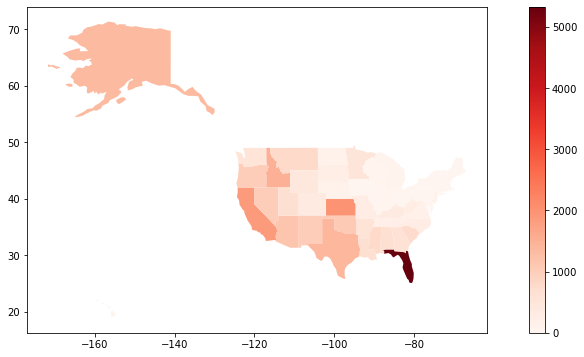

In [65]:
# create a static map of the number of fire per state
states_sjoin_2.plot(column='number_of_fires', figsize=(15, 6), cmap='Reds', legend=True)

<AxesSubplot:>

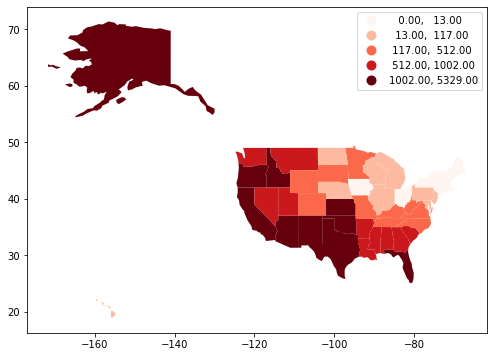

In [66]:
# Use Quantiles for the classification scheme (uses `mapclassify` package)
states_sjoin_2.plot(column='number_of_fires', figsize=(15, 6), cmap='Reds', legend=True, scheme='Quantiles')

<AxesSubplot:>

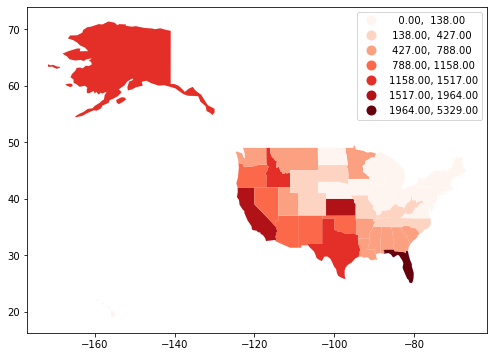

In [67]:
# Use FisherJenks algorithm of 7 classes (k) for the classification scheme (uses `mapclassify` package)
states_sjoin_2.plot(column='number_of_fires', figsize=(15, 6), cmap='Reds', legend=True, scheme='FisherJenks', k=7)